In [1]:
# import stuff

%matplotlib inline 

# libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import numpy.random as rng
np.set_printoptions(precision=6)
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# torch
import torch
import torch.nn as nn
import torch.optim as optim

# Fixing random state for reproducibility
torch.manual_seed(309)
np.random.seed(309)

(0.11304296851158141,
 1.9296524345874786,
 0.06845810413360595,
 1.8953296899795533)

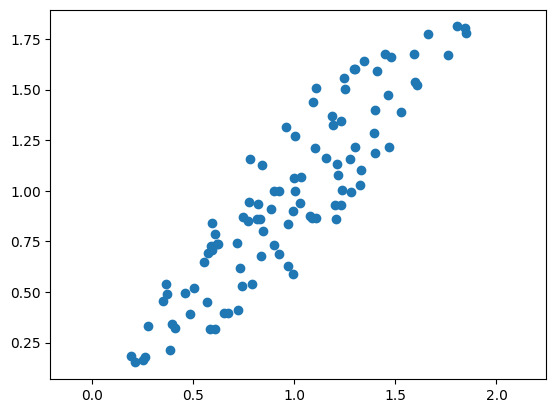

In [2]:
# make up some data for x
D = 2
x = torch.rand(100,D)
x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

## Define Encoder and Decoder Functions

In [3]:
def encoder(x, wEncoder, bEncoder):
    return torch.matmul(x, wEncoder) + bEncoder

def decoder(z, wDecoder, bDecoder):
    return torch.matmul(z, wDecoder) + bDecoder

def loss_function(x, x_reconstructed):
    return torch.mean((x - x_reconstructed) ** 2)

## Initialize Weights and Biases

In [4]:
wEncoder = torch.randn(D, 1, requires_grad=True)
wDecoder = torch.randn(1, D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1, D, requires_grad=True)

## Training Loop 1 (SGD)

In [5]:
learning_rate = 0.01
optimizer = optim.SGD([wEncoder, bEncoder, wDecoder, bDecoder], lr=learning_rate)

num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    z = encoder(x, wEncoder, bEncoder)
    x_reconstructed = decoder(z, wDecoder, bDecoder)

    # Compute the loss
    loss = loss_function(x, x_reconstructed)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training statistics (e.g., loss)
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 0.13273121416568756
Epoch [200/1000], Loss: 0.07940046489238739
Epoch [300/1000], Loss: 0.041302796453237534
Epoch [400/1000], Loss: 0.021312491968274117
Epoch [500/1000], Loss: 0.01326371543109417
Epoch [600/1000], Loss: 0.010387012735009193
Epoch [700/1000], Loss: 0.009414094500243664
Epoch [800/1000], Loss: 0.009089314378798008
Epoch [900/1000], Loss: 0.008977276273071766
Epoch [1000/1000], Loss: 0.008934357203543186


## Visualize improvement (training loop 1)

In [6]:
# Calculate weight ratios
weight_ratio_dim1 = wEncoder[0, 0] / wDecoder[0, 0]
weight_ratio_dim2 = wEncoder[1, 0] / wDecoder[0, 1]

print(f"Weight Ratio (Dimension 1): {weight_ratio_dim1}")
print(f"Weight Ratio (Dimension 2): {weight_ratio_dim2}")

Weight Ratio (Dimension 1): 1.049155592918396
Weight Ratio (Dimension 2): 1.5905253887176514


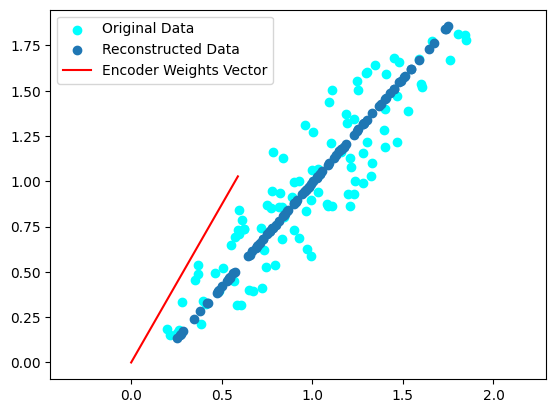

In [7]:
# Forward pass to get reconstructed data
z = encoder(x, wEncoder, bEncoder)
x_reconstruction = decoder(z, wDecoder, bDecoder)

# Create the scatterplot
plt.scatter(x[:, 0], x[:, 1], color='cyan', label='Original Data')
plt.scatter(x_reconstruction.detach().numpy()[:, 0], x_reconstruction.detach().numpy()[:, 1], label='Reconstructed Data')

# Plot the line from the origin to the vector formed by encoder weights
plt.plot([0, wEncoder[0, 0].detach().numpy()], [0, wEncoder[1, 0].detach().numpy()], '-r', label='Encoder Weights Vector')

plt.axis('equal')
plt.legend()
plt.show()

# Training Loop 2 (Momentum)

In [8]:
#random start
D = 2
x = torch.rand(100,D)
x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]

wEncoder = torch.randn(D, 1, requires_grad=True)
wDecoder = torch.randn(1, D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1, D, requires_grad=True)

# set momentum
m = 0.9

# set the learning rate
learning_rate = 0.01
optimizer = optim.SGD([wEncoder, bEncoder, wDecoder, bDecoder], lr=learning_rate, momentum=m)

num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    z = encoder(x, wEncoder, bEncoder)
    x_reconstructed = decoder(z, wDecoder, bDecoder)

    # Compute the loss
    loss = loss_function(x, x_reconstructed)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training statistics
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 0.05688004195690155
Epoch [200/1000], Loss: 0.03515342250466347
Epoch [300/1000], Loss: 0.022648487240076065
Epoch [400/1000], Loss: 0.016151539981365204
Epoch [500/1000], Loss: 0.013022366911172867
Epoch [600/1000], Loss: 0.011571073904633522
Epoch [700/1000], Loss: 0.010909775272011757
Epoch [800/1000], Loss: 0.010610884055495262
Epoch [900/1000], Loss: 0.01047628652304411
Epoch [1000/1000], Loss: 0.010415775701403618


## Visualize Improvement (training loop 2)

In [9]:
# Calculate weight ratios
weight_ratio_dim1 = wEncoder[0, 0] / wDecoder[0, 0]
weight_ratio_dim2 = wEncoder[1, 0] / wDecoder[0, 1]

print(f"Weight Ratio (Dimension 1): {weight_ratio_dim1}")
print(f"Weight Ratio (Dimension 2): {weight_ratio_dim2}")

Weight Ratio (Dimension 1): 0.13922026753425598
Weight Ratio (Dimension 2): 0.13748285174369812


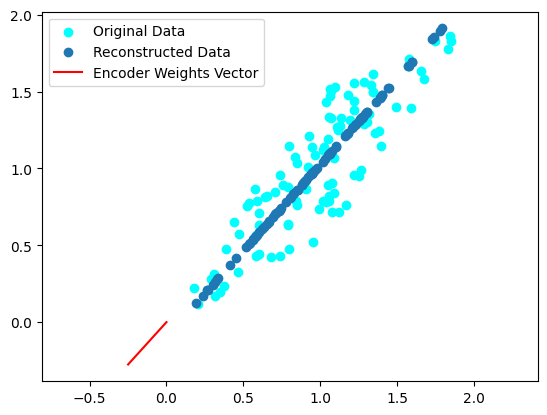

In [10]:
# Forward pass to get reconstructed data
z = encoder(x, wEncoder, bEncoder)
x_reconstruction = decoder(z, wDecoder, bDecoder)

# Create the scatterplot
plt.scatter(x[:, 0], x[:, 1], color='cyan', label='Original Data')
plt.scatter(x_reconstruction.detach().numpy()[:, 0], x_reconstruction.detach().numpy()[:, 1], label='Reconstructed Data')

# Plot the line from the origin to the vector formed by encoder weights
plt.plot([0, wEncoder[0, 0].detach().numpy()], [0, wEncoder[1, 0].detach().numpy()], '-r', label='Encoder Weights Vector')

plt.axis('equal')
plt.legend()
plt.show()

# Training Loop 3 (RMS Propagator)

In [11]:
# Random start
D = 2
x = torch.rand(100, D)
x[:, 0] = x[:, 0] + x[:, 1]
x[:, 1] = 0.5 * x[:, 0] + x[:, 1]

wEncoder = torch.randn(D, 1, requires_grad=True)
wDecoder = torch.randn(1, D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1, D, requires_grad=True)

# Set the learning rate and momentum
learning_rate = 0.01
m = 0.9

# Create an RMSprop optimizer with momentum
optimizer = optim.RMSprop([wEncoder, bEncoder, wDecoder, bDecoder], lr=learning_rate, alpha=m)

num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    z = encoder(x, wEncoder, bEncoder)
    x_reconstructed = decoder(z, wDecoder, bDecoder)

    # Compute the loss
    loss = loss_function(x, x_reconstructed)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training statistics
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')


Epoch [100/1000], Loss: 0.0393245704472065
Epoch [200/1000], Loss: 0.01927468739449978
Epoch [300/1000], Loss: 0.014430368319153786
Epoch [400/1000], Loss: 0.01256783027201891
Epoch [500/1000], Loss: 0.011671241372823715
Epoch [600/1000], Loss: 0.011185691691935062
Epoch [700/1000], Loss: 0.010904771275818348
Epoch [800/1000], Loss: 0.010735657997429371
Epoch [900/1000], Loss: 0.010631164535880089
Epoch [1000/1000], Loss: 0.010565276257693768


## Visualize Improvement (Training loop 3 with RMSprop)

In [12]:
# Calculate weight ratios
weight_ratio_dim1 = wEncoder[0, 0] / wDecoder[0, 0]
weight_ratio_dim2 = wEncoder[1, 0] / wDecoder[0, 1]

print(f"Weight Ratio (Dimension 1): {weight_ratio_dim1}")
print(f"Weight Ratio (Dimension 2): {weight_ratio_dim2}")

Weight Ratio (Dimension 1): 3.5963709354400635
Weight Ratio (Dimension 2): 4.409962177276611


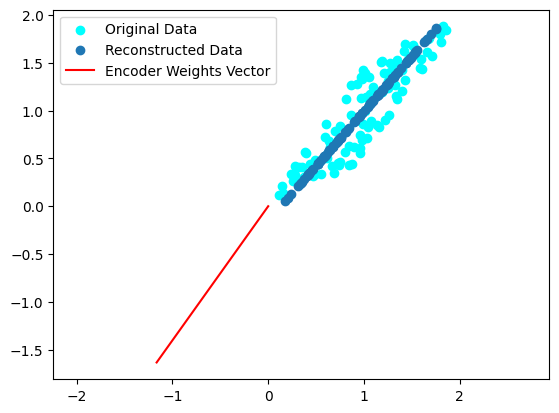

In [13]:
# Forward pass to get reconstructed data
z = encoder(x, wEncoder, bEncoder)
x_reconstruction = decoder(z, wDecoder, bDecoder)

# Create the scatterplot
plt.scatter(x[:, 0], x[:, 1], color='cyan', label='Original Data')
plt.scatter(x_reconstruction.detach().numpy()[:, 0], x_reconstruction.detach().numpy()[:, 1], label='Reconstructed Data')

# Plot the line from the origin to the vector formed by encoder weights
plt.plot([0, wEncoder[0, 0].detach().numpy()], [0, wEncoder[1, 0].detach().numpy()], '-r', label='Encoder Weights Vector')

plt.axis('equal')
plt.legend()
plt.show()

# Report

Training loops 1 and 2 were the most effective at minimizing the loss function and at fitting the points.

The straight line is caused by the data loss inherent to dimensionality reduction. The data points all lie along the best-fit line, demonstraining retention of crucal data. However, the variance and spread has been lost.

This sort of loss is expected with such a small sample set and low number of epochs. With more epochs and training on the sample set, dimensionality reduction and reconstuction could be made more accurate.